## Project Phase 1 - Data Cleaning and Exploration

Group Members:
Asim Waheed: 20100237
Omer Arshad: 20100194
Khawaja Umair ul Hassan: 20100286

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data_dir = 'data/'

### Loading the Data

In [2]:
aisles = pd.read_csv(data_dir+'aisles.csv')

print(aisles.head())
print(aisles.shape)

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
(134, 2)


In [3]:
departments = pd.read_csv(data_dir+'departments.csv')

print(departments.head())
print(departments.shape)

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
(21, 2)


In [4]:
products = pd.read_csv(data_dir+'products.csv')

print(products.head())
print(products.shape)

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
(49688, 4)


In [5]:
orders = pd.read_csv(data_dir+'orders.csv')

print(orders.head())
print(orders.tail())
print(orders.shape)

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
         order_id  user_id eval_set  order_number  order_dow  \
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14

In [6]:
# to find out what the eval set means
print(orders['eval_set'].unique())
# To find out total number of users who placed an order
print("Total number of users who placed an order:", len(orders['user_id'].unique()))

['prior' 'train' 'test']
Total number of users who placed an order: 206209


In [7]:
order_products_prior = pd.read_csv(data_dir+'order_products__prior.csv')

print(order_products_prior.head())
print(order_products_prior.shape)

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
(32434489, 4)


### Data Integrity Check / Data Cleaning

In [8]:
print("Check orders dataframe for NaNs:")
print(orders.isnull().sum(),"\n")

Check orders dataframe for NaNs:
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64 



Only 'days_since_prior_order' contains null values. This makes sense since users might place an order for the first time

In [9]:
print("Check order_products_prior dataframe for NaNs:")
print(order_products_prior.isnull().sum(),"\n")

print("Check aisles dataframe for NaNs:")
print(aisles.isnull().sum(),"\n")

print("Check products dataframe for NaNs:")
print(products.isnull().sum(),"\n")

print("Check departments dataframe for NaNs:")
print(departments.isnull().sum(),"\n")


Check order_products_prior dataframe for NaNs:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

Check aisles dataframe for NaNs:
aisle_id    0
aisle       0
dtype: int64 

Check products dataframe for NaNs:
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64 

Check departments dataframe for NaNs:
department_id    0
department       0
dtype: int64 



None of the other dataframes contain any NaN values. This means the data integrity is good and we do not need to perform any such data cleaning steps.

### Exploratory Data Analysis

##### What do people buy? More often sold product?

In [32]:
products_bought = pd.merge(order_products_prior, 
                      products[['product_id', 'product_name']], 
                      on='product_id')

products_bought_count = products_bought.groupby('product_name') \
                                        .count()['order_id'] \
                                        .reset_index() \
                                        .sort_values('order_id', ascending=False) \
                                        .reset_index()[['product_name','order_id']]


In [33]:
print(products_bought_count.head(20))

                product_name  order_id
0                     Banana    472565
1     Bag of Organic Bananas    379450
2       Organic Strawberries    264683
3       Organic Baby Spinach    241921
4       Organic Hass Avocado    213584
5            Organic Avocado    176815
6                Large Lemon    152657
7               Strawberries    142951
8                      Limes    140627
9         Organic Whole Milk    137905
10       Organic Raspberries    137057
11      Organic Yellow Onion    113426
12            Organic Garlic    109778
13          Organic Zucchini    104823
14       Organic Blueberries    100060
15            Cucumber Kirby     97315
16        Organic Fuji Apple     89632
17             Organic Lemon     87746
18  Apple Honeycrisp Organic     85020
19    Organic Grape Tomatoes     84255


As can be seen, most people buy Bananas, and even the second most bought item is organic bananas. 

##### At what hour of the day?

count    206209.000000
mean         13.585248
std           2.020743
min           0.750000
5%           10.333333
10%          11.000000
25%          12.250000
50%          13.571429
75%          14.900000
90%          16.153846
95%          16.928571
max          23.000000
Name: order_hour_of_day, dtype: float64


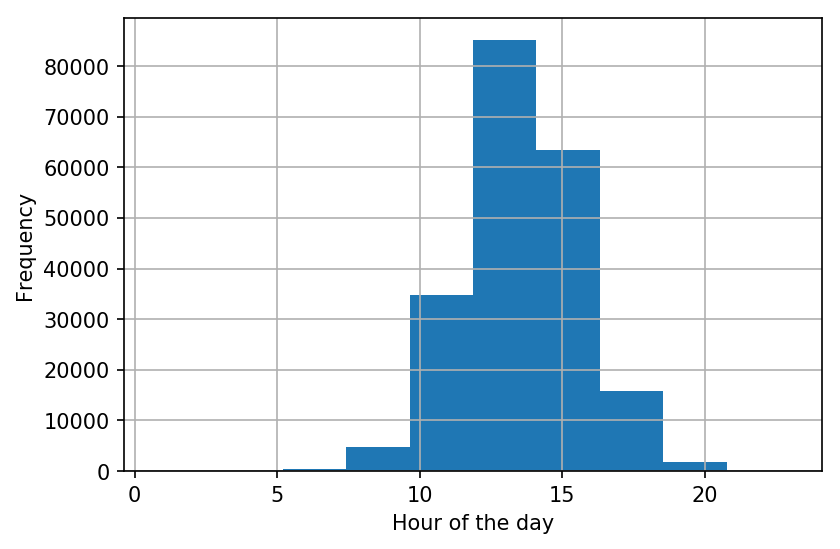

In [48]:
order_time = orders.groupby('user_id').mean()['order_hour_of_day']

print(order_time.describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]))
plt.figure(dpi=150)
plt.xlabel('Hour of the day')
plt.ylabel('Frequency')
order_time.hist()
plt.show()

On average people tend to place their orders at 1pm (13:00). In fact, 90% of the people (95th percentile - 5th percentile) place their orders between 10am and 4pm. Only 10% people place it before or after than.

##### At which day of the week?

count    206209.000000
mean          2.754424
std           0.892705
min           0.000000
5%            1.250000
10%           1.600000
25%           2.214286
50%           2.766667
75%           3.285714
90%           3.842105
95%           4.250000
max           6.000000
Name: order_dow, dtype: float64


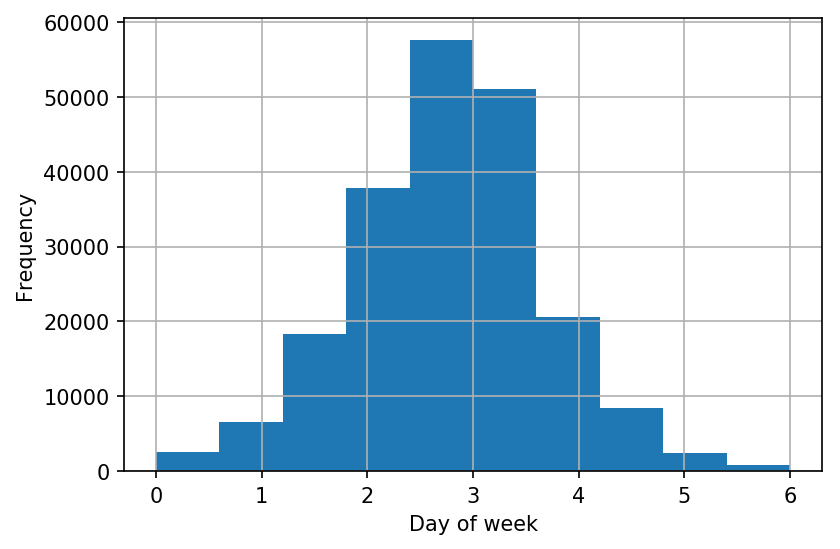

In [47]:
order_day = orders.groupby('user_id').mean()['order_dow']

percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]

print(order_day.describe(percentiles))
plt.figure(dpi=150)
plt.xlabel('Day of week')
plt.ylabel('Frequency')
order_day.hist()
plt.show()

This is distributed a little more evenly, however since the dataset does not state what the number "0" represents, we are going to assume 0 means Monday, and 6 means Sunday. According to this logic, most people order items during the weekdays between Mondays and Fridays (look at 5th and 95th percentile values). And most people order items on a Wednesday

##### When do customers order?

The previous two questions also answer this question.

##### When do customers order again?

count    206209.000000
mean         15.448686
std           6.915575
min           0.000000
5%            5.189189
10%           6.666667
25%           9.814815
50%          15.000000
75%          20.625000
90%          25.142857
95%          27.750000
max          30.000000
Name: days_since_prior_order, dtype: float64


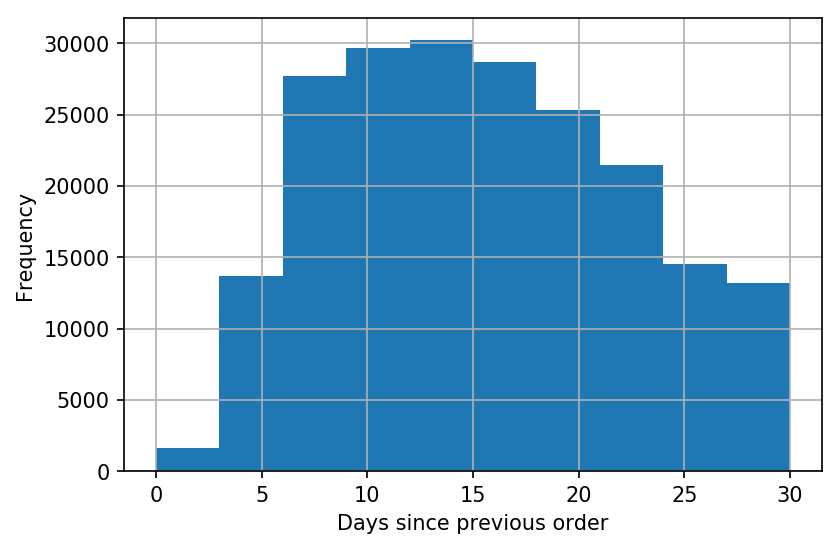

In [49]:
order_again = orders.groupby('user_id').mean()['days_since_prior_order']
print(order_again.describe(percentiles))
plt.figure(dpi=150)
plt.xlabel('Days since previous order')
plt.ylabel('Frequency')
order_again.hist()
plt.show()

Customers usually order again after about 15 days, however the difference in frequency between 15 days, 10 days and even 20 days is not too much. However, the histogram is skewed to the left in the sense that more people place orders after 30 days (the max) than they do after 0 day (the min).

##### How many prior orders do customers have?

First we needed to check what part of the dataset contains this information

In [51]:
print(orders[orders['user_id'] == 1])

    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0    2539329        1    prior             1          2                  8   
1    2398795        1    prior             2          3                  7   
2     473747        1    prior             3          3                 12   
3    2254736        1    prior             4          4                  7   
4     431534        1    prior             5          4                 15   
5    3367565        1    prior             6          2                  7   
6     550135        1    prior             7          1                  9   
7    3108588        1    prior             8          1                 14   
8    2295261        1    prior             9          1                 16   
9    2550362        1    prior            10          4                  8   
10   1187899        1    train            11          4                  8   

    days_since_prior_order  
0                      NaN  
1    

Strategy: Remove all the rows in which days_since_prior_orders is "NaN", and then simply find the count of days_since_prior_order for each customer

In [57]:
prior_orders = orders[orders['days_since_prior_order'].notnull()]
print(prior_orders[prior_orders['user_id'] == 1])

    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
1    2398795        1    prior             2          3                  7   
2     473747        1    prior             3          3                 12   
3    2254736        1    prior             4          4                  7   
4     431534        1    prior             5          4                 15   
5    3367565        1    prior             6          2                  7   
6     550135        1    prior             7          1                  9   
7    3108588        1    prior             8          1                 14   
8    2295261        1    prior             9          1                 16   
9    2550362        1    prior            10          4                  8   
10   1187899        1    train            11          4                  8   

    days_since_prior_order  
1                     15.0  
2                     21.0  
3                     29.0  
4                     28.

count    206209.000000
mean         15.590367
std          16.654774
min           3.000000
5%            3.000000
10%           3.000000
25%           5.000000
50%           9.000000
75%          19.000000
90%          37.000000
95%          51.000000
max          99.000000
Name: days_since_prior_order, dtype: float64


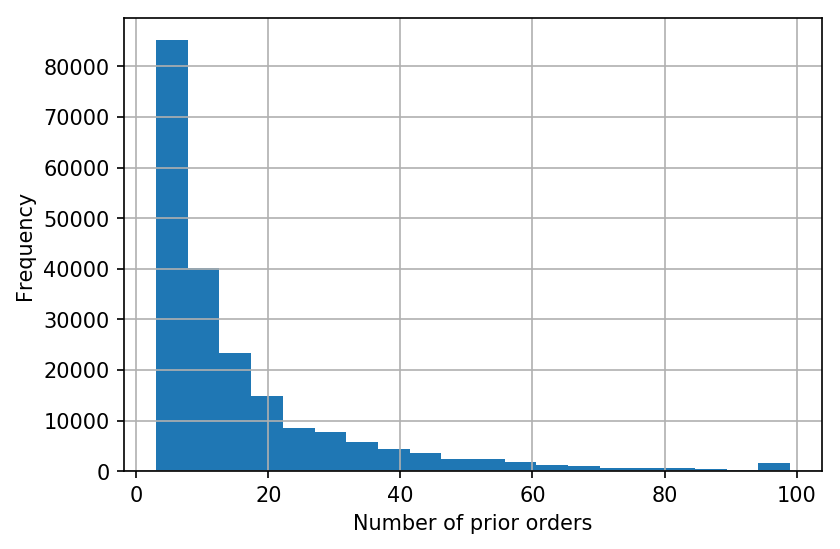

In [83]:
prior_orders_count = prior_orders.groupby('user_id') \
                                    .count()['days_since_prior_order'] \

print(prior_orders_count.describe(percentiles))
plt.figure(dpi=150)
plt.xlabel('Number of prior orders')
plt.ylabel('Frequency')
prior_orders_count.hist(bins=20)
plt.show()

On average, customers have about 15 prior orders. But as can be seen, the histogram is extremely skewed to the right, so the mean is not a good way to tell. 50% of the people actually have 9 or less prior orders. The mean is effected because of 1 (or more? let's find out) customer than has 99 prior orders who seems to be an outlier.

In [68]:
print(len(prior_orders_count[prior_orders_count >= 90]))

1905


There are actually 1905 users that have more 90 prior orders, but they should still be considered outliers since the total number is in fact 206,209.

##### How many items do customers usually order

This question can be interpreted as how many items are there in an order

In [76]:
items_count = order_products_prior.groupby('order_id').count()['product_id']
print(items_count.head())

order_id
2     9
3     8
4    13
5    26
6     3
Name: product_id, dtype: int64


count    3.214874e+06
mean     1.008888e+01
std      7.525398e+00
min      1.000000e+00
5%       2.000000e+00
10%      2.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
90%      2.000000e+01
95%      2.500000e+01
max      1.450000e+02
Name: product_id, dtype: float64


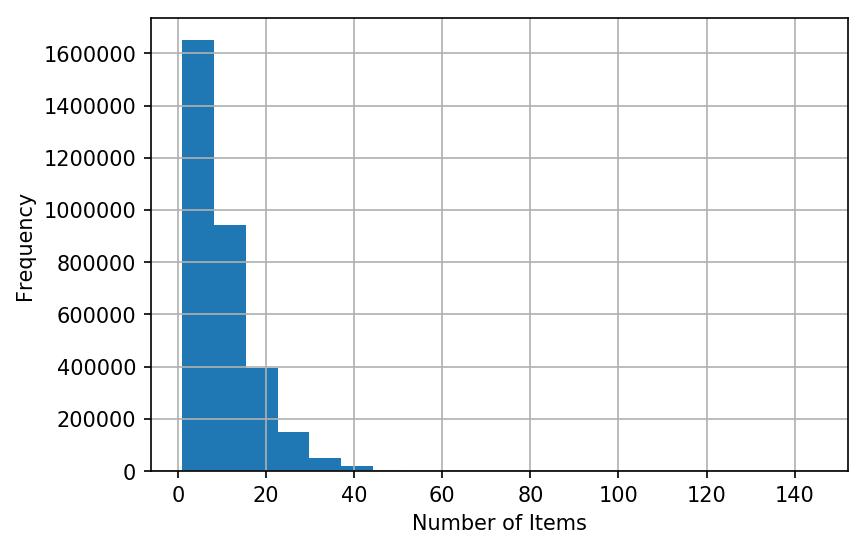

In [82]:
print(items_count.describe(percentiles))
plt.figure(dpi=150)
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
items_count.hist(bins=20)
plt.show()

On average customers order just 1 item in one order. However, once again the histogram is extremely skewed to the right. The median of the data is actually 8. Moreover, the data also has outliers in this case, since the max value here is 145 items in a single order! Even though the 95% percentile is 25 items in a single order. 

##### How often do people order the same items again?

In [85]:
reordered_items = order_products_prior[order_products_prior['reordered'] == 1]
print(reordered_items.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
3         2       45918                  4          1
5         2       17794                  6          1
6         2       40141                  7          1


In [91]:
num_reorder_per_order = reordered_items.groupby('order_id').count()['reordered'].reset_index()
print(num_reorder_per_order.head())

   order_id  reordered
0         2          6
1         3          8
2         4         12
3         5         21
4         8          1


In [92]:
user_reorder_count = pd.merge(orders[['order_id','user_id']], num_reorder_per_order, on='order_id')
print(user_reorder_count.head())

   order_id  user_id  reordered
0   2398795        1          3
1    473747        1          3
2   2254736        1          5
3    431534        1          5
4   3367565        1          4


In [95]:
num_user_reorder = user_reorder_count.groupby('user_id').sum()['reordered']
print(num_user_reorder.head())

user_id
1    41
2    93
3    55
4     1
5    14
Name: reordered, dtype: int64


count    203164.000000
mean         94.143332
std         159.172463
min           1.000000
5%            2.000000
10%           4.000000
25%          11.000000
50%          34.000000
75%         103.000000
90%         256.000000
95%         406.000000
max        3275.000000
Name: reordered, dtype: float64


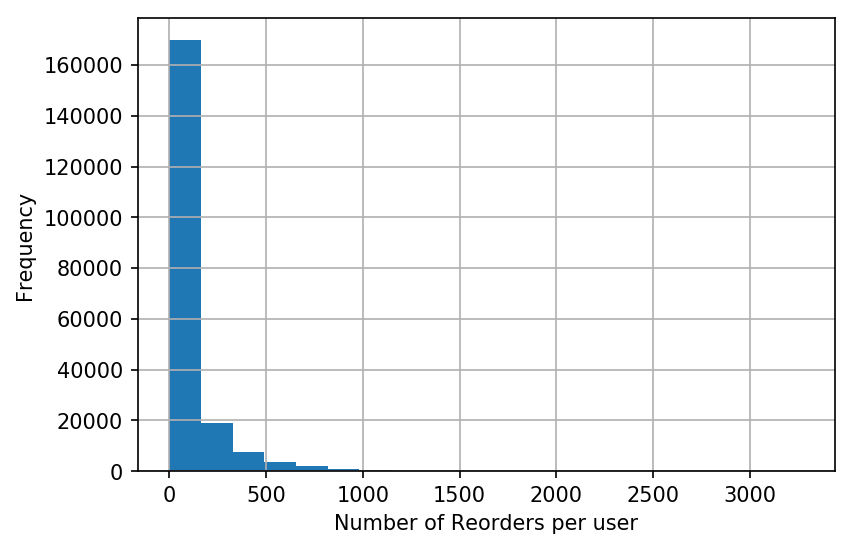

In [96]:
print(num_user_reorder.describe(percentiles))
plt.figure(dpi=150)
plt.xlabel('Number of Reorders per user')
plt.ylabel('Frequency')
num_user_reorder.hist(bins=20)
plt.show()

On average users reorder items about 94 times. But this is, as before, also right-skewed, and the median value is actually 34 reorders per user. The max is also unusually high, at 3275.

##### Which product put first

In [99]:
first_items = order_products_prior[order_products_prior['add_to_cart_order'] == 1]
print(first_items.head())

    order_id  product_id  add_to_cart_order  reordered
0          2       33120                  1          1
9          3       33754                  1          1
17         4       46842                  1          0
30         5       13176                  1          1
56         6       40462                  1          0


In [106]:
first_item_names = pd.merge(first_items, 
                            products[['product_id', 'product_name']], 
                            on='product_id').sort_values('order_id')

print(first_item_names.head())

       order_id  product_id  add_to_cart_order  reordered  \
0             2       33120                  1          1   
2379          3       33754                  1          1   
5036          4       46842                  1          0   
6027          5       13176                  1          1   
85015         6       40462                  1          0   

                                            product_name  
0                                     Organic Egg Whites  
2379   Total 2% with Strawberry Lowfat Greek Strained...  
5036                             Plain Pre-Sliced Bagels  
6027                              Bag of Organic Bananas  
85015                                            Cleanse  


In [107]:
put_first_count = first_item_names.groupby('product_name') \
                                    .count()['order_id'] \
                                    .sort_values(ascending=False)
print(put_first_count.head())

product_name
Banana                    110916
Bag of Organic Bananas     78988
Organic Whole Milk         30927
Organic Strawberries       27975
Organic Hass Avocado       24116
Name: order_id, dtype: int64


This is also bananas